# The goal of this notebook is to create maps and plots to visualize the US Midwest fields data.

## importing libraries

In [11]:
import folium
import os
import matplotlib.pyplot as plt
import pandas as pd
import rasterio 
import numpy

## showing locations

In [12]:
# data are taken from https://figshare.com/articles/dataset/Data_for_Multi-site_evaluation_of_stratified_and_balanced_sampling_of_soil_organic_carbon_stocks_in_agricultural_fields_/23669304
df_loc = pd.read_csv('data/U.S. Midwest fields/locations.csv')
df_mes = pd.read_csv('data/U.S. Midwest fields/measurements.csv')

map = folium.Map([40.808, -92.265], zoom_start=6)

for site in list(set(df_loc['site'])):
    rows = df_loc[df_loc['site'] == site]
    row = rows.iloc[-1]
    folium.Marker(
        location=(row['Y'], row['X'])
    ).add_to(map)

map

## plotting soil organic carbon and bulk density of each field for each level of depth

IL-DG
SOCc


BD


IL-PT
SOCc


BD


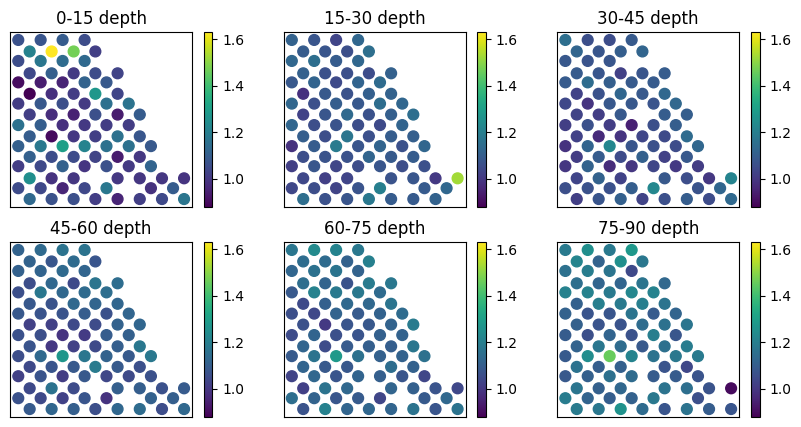

IL-BR
SOCc


BD


NE
SOCc


BD


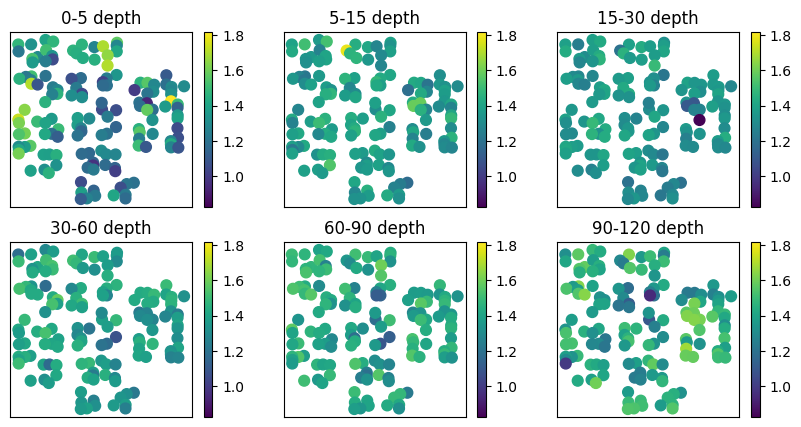

IL-RT
SOCc


BD


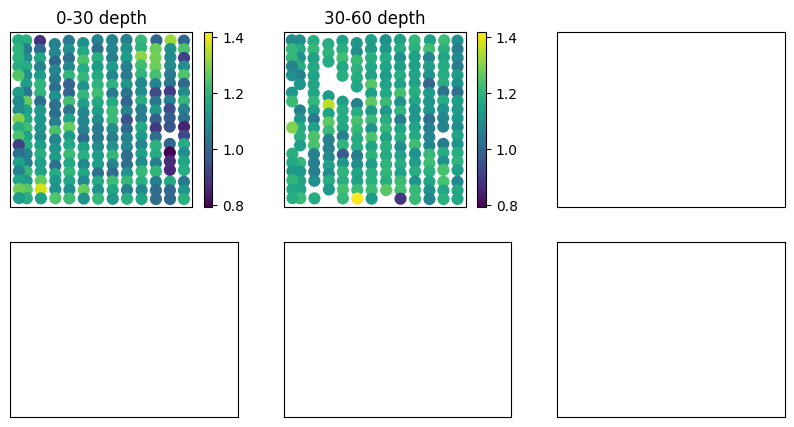

IL-RD
SOCc


BD


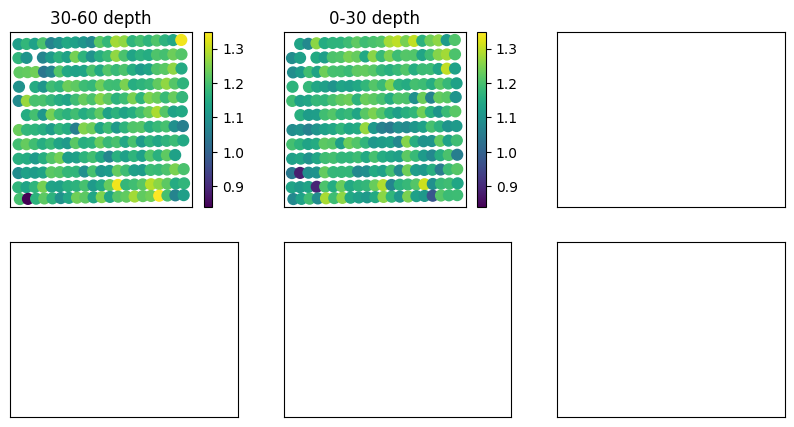

IL-RS
SOCc


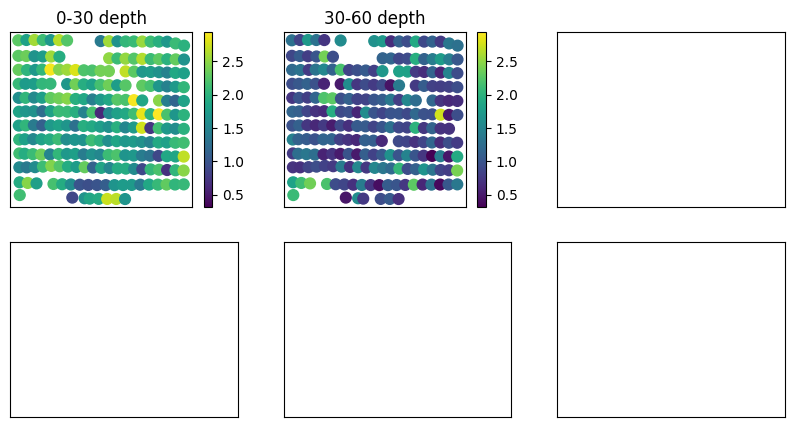

BD


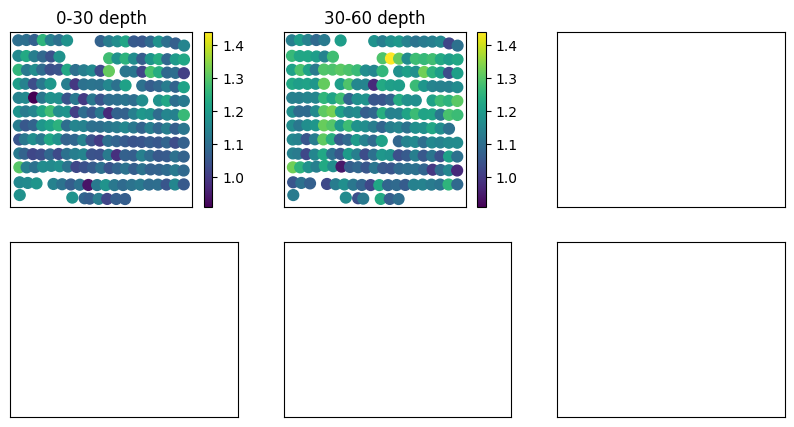

IL-MC
SOCc


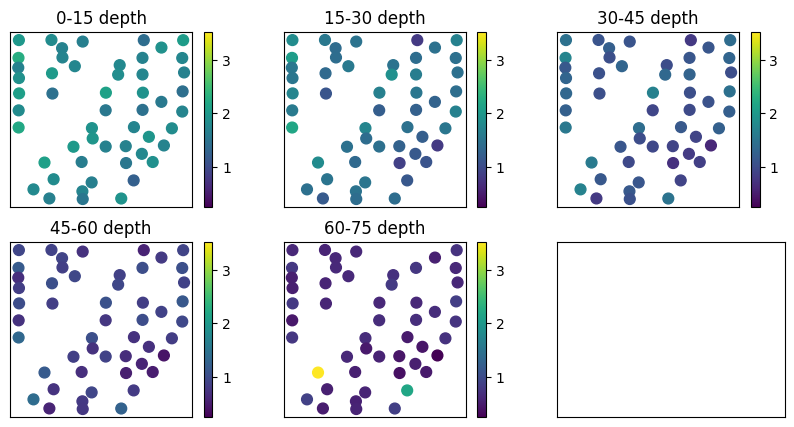

BD


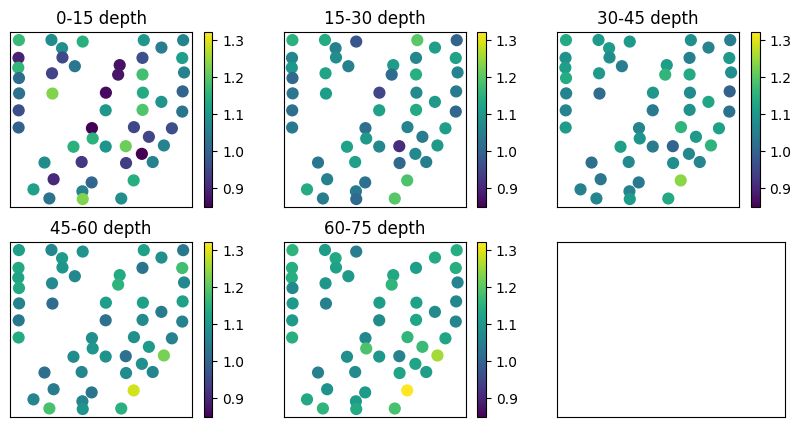

In [13]:
sites_names = set(df_loc['site'])

for site in sites_names:
    print(site)

    for column in ['SOCc', 'BD']:
        print(column)

        fig, axs = plt.subplots(2, 3, figsize=(10, 5))
        size = 60

        sites = {}

        ds = df_mes[df_mes['site'] == site]
        
        for index, row in ds.iterrows():

            sample_depth_min = row['sample_depth_min']
            sample_depth_max = int(row['sample_depth_max'])

            key = str(sample_depth_min) + "-" + str(sample_depth_max)

            if key not in sites:
                sites[key] = {
                    "X" : [],
                    "Y" : [],
                    column : [],
                }


            row_loc = df_loc[df_loc['location_id'] == row['location_id']]
            row_loc = row_loc[row_loc['site'] == site]

            X = row_loc['X'].iloc[0]
            Y = row_loc['Y'].iloc[0]

            col = row[column]
            
            sites[key]['X'].append(X)
            sites[key]['Y'].append(Y)
            sites[key][column].append(col)

        for key in list(sites.keys()):
            if len(sites[key]['X']) < 3:
                sites.pop(key)

        min = 10
        max = 0
        for key in sites:
            for elem in sites[key][column]:
                if elem > max:
                    max = elem
                if elem < min:
                    min = elem

        for i, key in enumerate(sites):
            riga = i // 3
            colonna = i % 3
            p = axs[riga, colonna].scatter(sites[key]['X'], sites[key]['Y'], s=size, c=sites[key][column], vmin=min, vmax=max)
            axs[riga, colonna].set_title(key + " depth")
            plt.colorbar(p, location='right')
            

        for i in range(6):
            riga = i // 3
            colonna = i % 3
            axs[riga, colonna].xaxis.set_visible(False)
            axs[riga, colonna].yaxis.set_visible(False)

        plt.show()

## the images of the fields are downloaded from sentinel-2 through sentinel-hub package

## plotting NDVI for each field

IL-BR


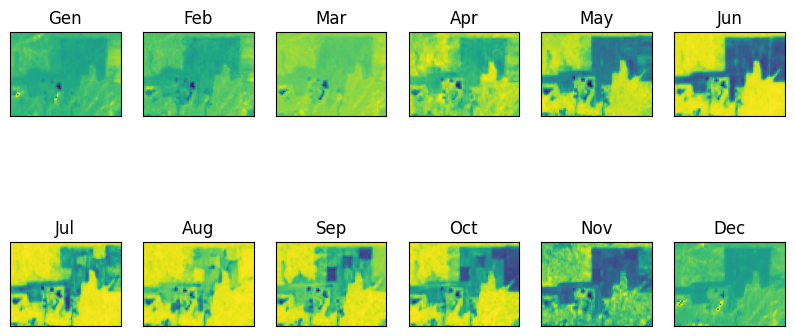

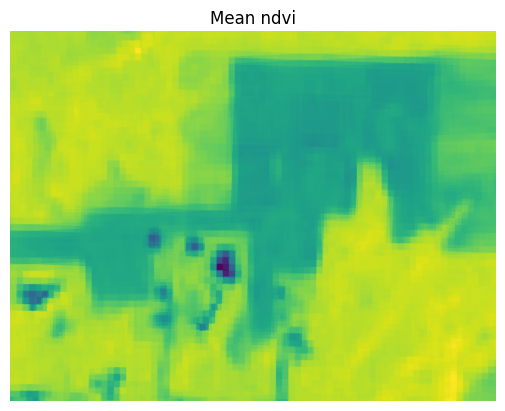

IL-DG


IL-MC


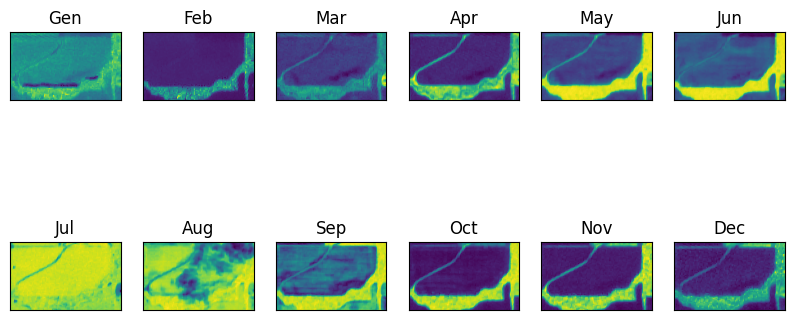

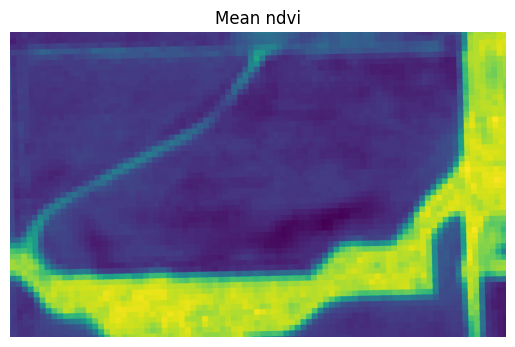

IL-PT


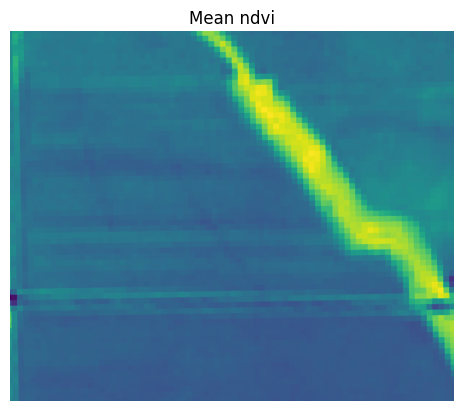

IL-RD


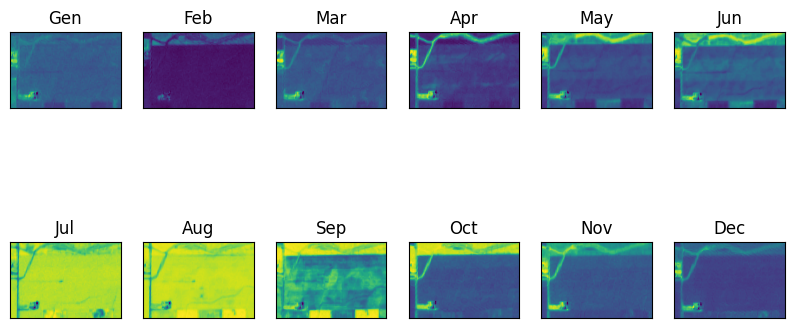

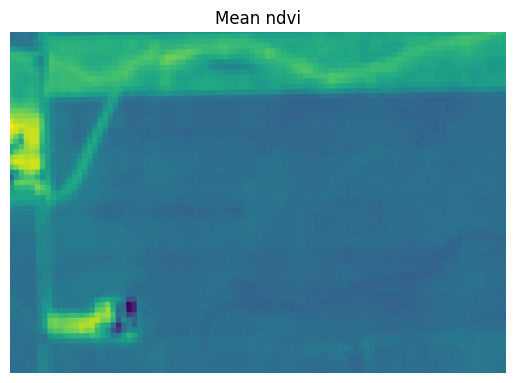

IL-RS


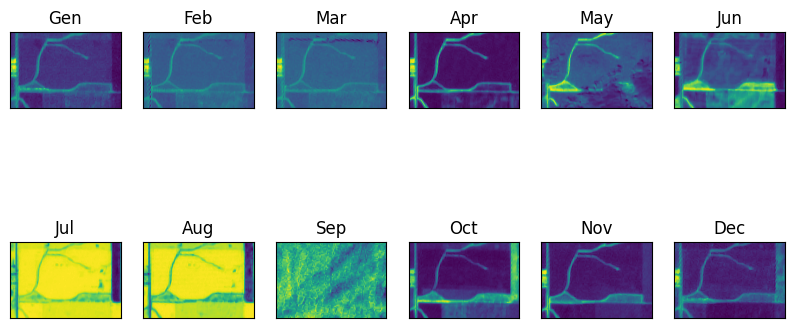

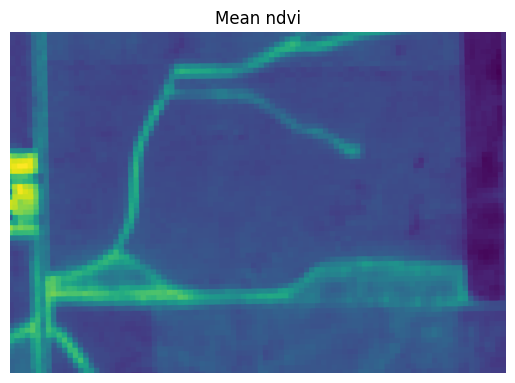

IL-RT


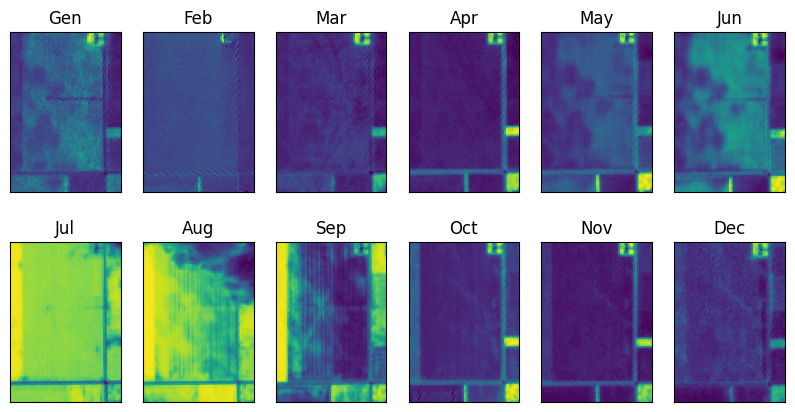

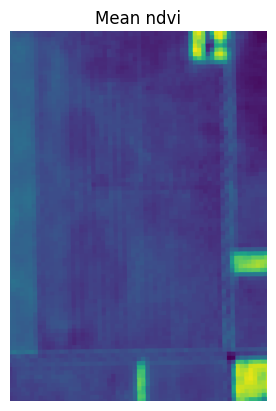

NE


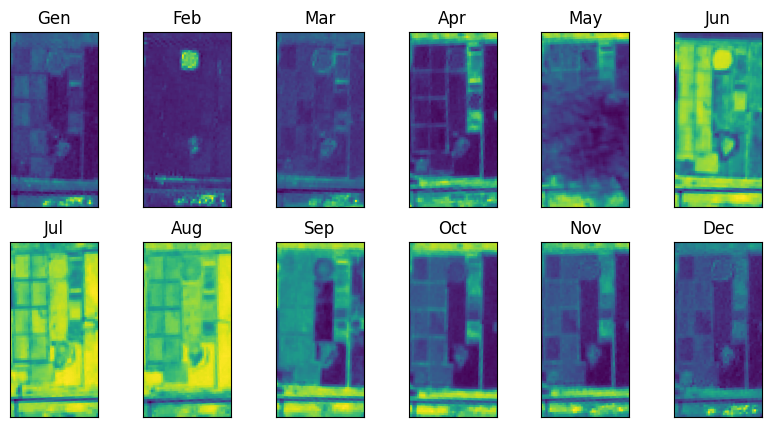

In [14]:
mounths = ['Gen', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for field in os.listdir('data/U.S. Midwest fields/immagini'):

    print(field)

    fig, axs = plt.subplots(2, 6, figsize=(10, 5))

    for i in range(len(axs)):
        for j in range(len(axs[i])):
            axs[i][j].set_title(mounths[i*6 + j])

    found = False

    for name in os.listdir('data/U.S. Midwest fields/immagini/' + field):

        raster = rasterio.open('data/U.S. Midwest fields/immagini/' + field + "/" + name + "/response.tiff")

        mounth = int(name.split('-')[1]) - 1

        red = numpy.array(raster.read(4), dtype=numpy.float64) / 10000
        nir = numpy.array(raster.read(8), dtype=numpy.float64) / 10000
        ndvi = (nir - red) / (nir + red)

        if not found:
            mean = ndvi
            found = True
        else:
            mean += ndvi

        axs[mounth // 6, mounth % 6].imshow(ndvi)
        axs[mounth // 6, mounth % 6].xaxis.set_visible(False)
        axs[mounth // 6, mounth % 6].yaxis.set_visible(False)

        raster.close()

    mean /= 12

    plt.show()
    plt.imshow(mean)
    plt.title("Mean ndvi")
    plt.axis("off")
    plt.show()